<a href="https://colab.research.google.com/github/vaishnavi-3969/Deep-Learning/blob/main/Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
import pandas

od.download(
    'https://www.kaggle.com/datasets/mohansacharya/graduate-admissions'
    )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaishnaviakale
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions


100%|██████████| 9.64k/9.64k [00:00<00:00, 15.3MB/s]

In [3]:
path = '/content/graduate-admissions/Admission_Predict_Ver1.1.csv'

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.shape

(500, 9)

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
X = df.iloc[:,0:-1]

In [12]:
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(7,activation='relu', input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics='accuracy')

In [31]:
history = model.fit(X_train_scaled, y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0121 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - 

In [32]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8240849725212545

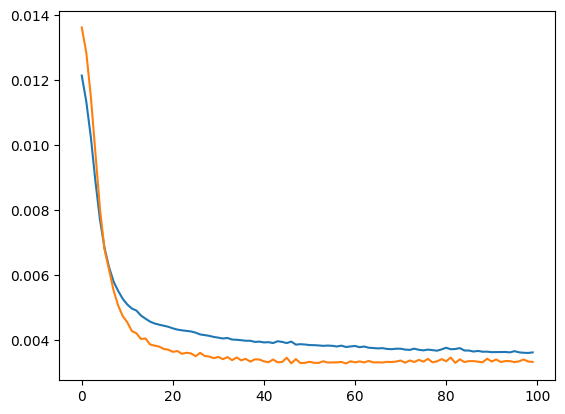

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])